In [7]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [8]:
def get_linear_reg_params(X, y, predict = False):
    """
    This function obtains the linear regression parameters using the normal equation
    Inputs:
    1. X: vector of regressors
    2. y: vector of responses
    Returns:
    The vector of linear regression parameters
    """
    X = np.c_[np.ones((len(X),1)), X] # add 1 to each value of x-vector
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    if predict == True:
        y_pred = X.dot(theta)
        residual = y - y_pred
        return theta, y_pred, residual
    else:
        return theta

In [9]:
def predict(X, theta):
    """
    This function returns the predicted response values from X
    Inputs:
    1. X: vector of regressors
    2. theta: vector of linear regression parameters
    Returns:
    The predicted response
    """
    X = np.c_[np.ones((len(X),1)), X] # add 1 to each value of x-vector
    y_pred = X.dot(theta)
    return y_pred

In [10]:
def mi_to_km(item):
    return 1.60934*item

In [11]:
"""
Variables and their response

df: original DataFrame
com_df: Dataframe with completed X and y values
incomp_df: DataFrame with complete X values and no y values

comp_X: X vector with complete dataframe
comp_y: y vector with complete dataframe
incomp_X: X vector from incomplete dataframe
incomp_y_pred: vector of y_pred from incomplete dataframe
incomp_y_actual: vector of y_actual from incomplete dataframe calculated from y_actual = residuals + y_pred
all_X: vector of X from complete and incomplete dataframe
all_y: vector of y from complete and incomplete dataframe(after calculation from residuals)

com_params: linear regression parameters from the complete dataframe
com_ypred: vector of y predictions from the complete dataset
residuals: vector of residual from the complete dataframe
"""

'\nVariables and their response\n\ndf: original DataFrame\ncom_df: Dataframe with completed X and y values\nincomp_df: DataFrame with complete X values and no y values\n\ncomp_X: X vector with complete dataframe\ncomp_y: y vector with complete dataframe\nincomp_X: X vector from incomplete dataframe\nincomp_y_pred: vector of y_pred from incomplete dataframe\nincomp_y_actual: vector of y_actual from incomplete dataframe calculated from y_actual = residuals + y_pred\nall_X: vector of X from complete and incomplete dataframe\nall_y: vector of y from complete and incomplete dataframe(after calculation from residuals)\n\ncom_params: linear regression parameters from the complete dataframe\ncom_ypred: vector of y predictions from the complete dataset\nresiduals: vector of residual from the complete dataframe\n'

# EPA and WLTP

In [38]:
#Extract and create dataframes
df = pd.read_excel('bootstrap.xlsx')
comp_df = df[['WLTP', 'EPA']].dropna()
incomp_df = df[['WLTP', 'EPA']].dropna(how = 'all')
incomp_df = incomp_df[incomp_df['EPA'].isna()]

In [39]:
# miles to km
comp_df = comp_df.apply(lambda x: mi_to_km(x))
incomp_df = incomp_df.apply(lambda x: mi_to_km(x))

In [40]:
#Extract complete X and y numpy array from dataframe
comp_X = comp_df['WLTP'].to_numpy()
comp_y = comp_df['EPA'].to_numpy()

incomp_X = incomp_df['WLTP'].to_numpy()

In [41]:
#Calculate the linear regression, predicted y values, and residuals for complete data
com_params, com_ypred, residuals = get_linear_reg_params(comp_X, comp_y, predict = True)

In [42]:
com_params

array([-57.18571067,   1.05622785])

In [43]:
np.random.seed(0)

In [44]:
theta0_list = []
theta1_list = []
iter_list = []
for i in range(2000):
    #Create a random list of residual with replacement with the size of incompete
    random_residual_list = np.random.choice(residuals, size = len(incomp_df), replace = True)

    #Calculate the y_actual from the incomplete dataframe using residuals
    incomp_y_actual = predict(incomp_X, com_params) + random_residual_list

    #Combine X and y from complete and incomplete dataframe and get linear regression parameters
    all_X = np.concatenate((comp_X, incomp_X))
    all_y = np.concatenate((comp_y, incomp_y_actual))
    all_params = get_linear_reg_params(all_X, all_y, predict = False)
    theta0 = all_params[0]
    theta1 = all_params[1]
    iter_list.append(i+1)
    theta0_list.append(theta0)
    theta1_list.append(theta1)

In [45]:
result_dict = {'iteration':iter_list,
 'theta0':theta0_list,
'theta1':theta1_list}

In [46]:
results = pd.DataFrame(result_dict)

In [47]:
def special_mean(x,col):
    s_mean = np.mean(results.iloc[0:(x.name+1)][col])
    return s_mean

In [48]:
results['theta0_mean'] = results.apply(lambda x:special_mean(x,'theta0'), axis = 1)

In [49]:
results['theta1_mean'] = results.apply(lambda x:special_mean(x,'theta1'), axis = 1)

In [50]:
results.to_excel('bootstrap_results-2000iterations.xlsx')

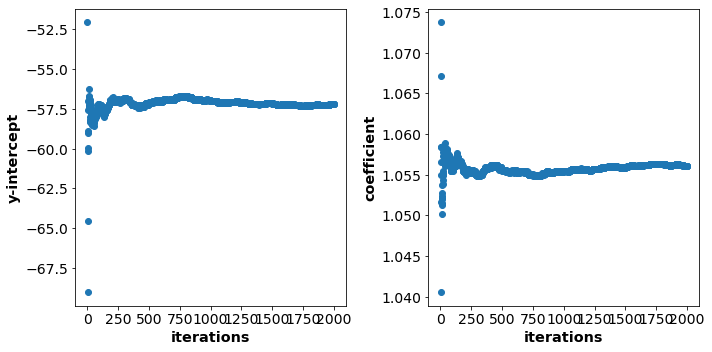

In [51]:
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.scatter(results['iteration'],results['theta0_mean'])
plt.xlabel('iterations', fontweight = 'bold', fontsize = 'x-large')
plt.ylabel('y-intercept', fontweight = 'bold', fontsize = 'x-large')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(results['iteration'],results['theta1_mean'])
plt.xlabel('iterations', fontweight = 'bold', fontsize = 'x-large')
plt.ylabel('coefficient', fontweight = 'bold', fontsize = 'x-large')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

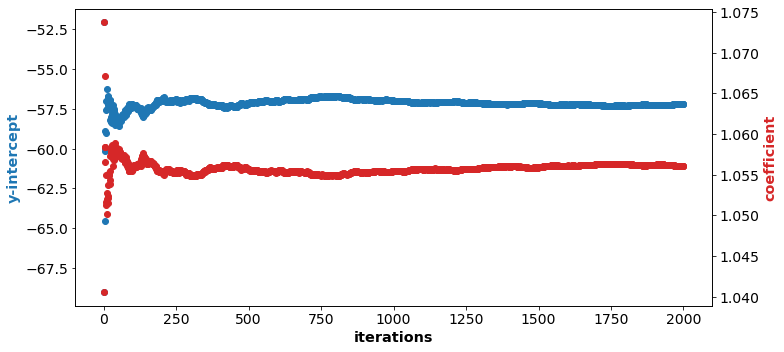

In [53]:
fig = plt.figure(figsize = (20,5))

color = 'tab:blue'
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(results['iteration'],results['theta0_mean'])
plt.xlabel('iterations', fontweight = 'bold', fontsize = 'x-large')
plt.ylabel('y-intercept', fontweight = 'bold', fontsize = 'x-large', color =color)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.scatter(results['iteration'],results['theta1_mean'], color = color)
plt.ylabel('coefficient', fontweight = 'bold', fontsize = 'x-large', color = color)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

# EPA and NEDC

In [70]:
#Extract and create dataframes
df = pd.read_excel('bootstrap.xlsx')
comp_df = df[['NEDC', 'EPA']].dropna()
incomp_df = df[['NEDC', 'EPA']].dropna(how = 'all')
incomp_df = incomp_df[incomp_df['EPA'].isna()]

In [71]:
# miles to km
comp_df = comp_df.apply(lambda x: mi_to_km(x))
incomp_df = incomp_df.apply(lambda x: mi_to_km(x))

In [72]:
#Extract complete X and y numpy array from dataframe
comp_X = comp_df['NEDC'].to_numpy()
comp_y = comp_df['EPA'].to_numpy()

incomp_X = incomp_df['NEDC'].to_numpy()

In [73]:
#Calculate the linear regression, predicted y values, and residuals for complete data
com_params, com_ypred, residuals = get_linear_reg_params(comp_X, comp_y, predict = True)

In [74]:
com_params

array([-61.52656838,   0.96911513])

In [75]:
np.random.seed(0)

In [76]:
theta0_list = []
theta1_list = []
iter_list = []
for i in range(2000):
    #Create a random list of residual with replacement with the size of incompete
    random_residual_list = np.random.choice(residuals, size = len(incomp_df), replace = True)

    #Calculate the y_actual from the incomplete dataframe using residuals
    incomp_y_actual = predict(incomp_X, com_params) + random_residual_list

    #Combine X and y from complete and incomplete dataframe and get linear regression parameters
    all_X = np.concatenate((comp_X, incomp_X))
    all_y = np.concatenate((comp_y, incomp_y_actual))
    all_params = get_linear_reg_params(all_X, all_y, predict = False)
    theta0 = all_params[0]
    theta1 = all_params[1]
    iter_list.append(i+1)
    theta0_list.append(theta0)
    theta1_list.append(theta1)

In [77]:
result_dict = {'iteration':iter_list,
 'theta0':theta0_list,
'theta1':theta1_list}

In [78]:
results = pd.DataFrame(result_dict)

In [79]:
def special_mean(x,col):
    s_mean = np.mean(results.iloc[0:(x.name+1)][col])
    return s_mean

In [80]:
results['theta0_mean'] = results.apply(lambda x:special_mean(x,'theta0'), axis = 1)

In [81]:
results['theta1_mean'] = results.apply(lambda x:special_mean(x,'theta1'), axis = 1)

In [82]:
results

,iteration,theta0,theta1,theta0_mean,theta1_mean
0,1,-61.407541,0.971160,-61.407541,0.971160
1,2,-61.176959,0.967208,-61.292250,0.969184
2,3,-61.509353,0.967732,-61.364618,0.968700
3,4,-61.835177,0.970114,-61.482258,0.969053
4,5,-60.610365,0.969148,-61.307879,0.969072
...,...,...,...,...,...
1995,1996,-62.106444,0.969304,-61.539946,0.969127
1996,1997,-60.967556,0.969481,-61.539659,0.969127
1997,1998,-61.643721,0.969042,-61.539711,0.969127
1998,1999,-61.338773,0.967458,-61.539611,0.969126


In [83]:
results.to_excel('bootstrap_results-NEDC-2000iterations.xlsx', index=False)

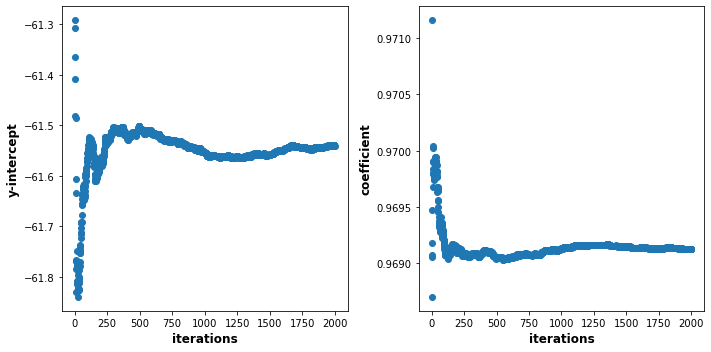

In [84]:
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.scatter(results['iteration'],results['theta0_mean'])
plt.xlabel('iterations', fontweight = 'bold', fontsize = 'large')
plt.ylabel('y-intercept', fontweight = 'bold', fontsize = 'large')

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(results['iteration'],results['theta1_mean'])
plt.xlabel('iterations', fontweight = 'bold', fontsize = 'large')
plt.ylabel('coefficient', fontweight = 'bold', fontsize = 'large')

#plt.title('EPA[mi] vs. NEDC[mi]', loc='center', fontsize = 20)

plt.tight_layout()

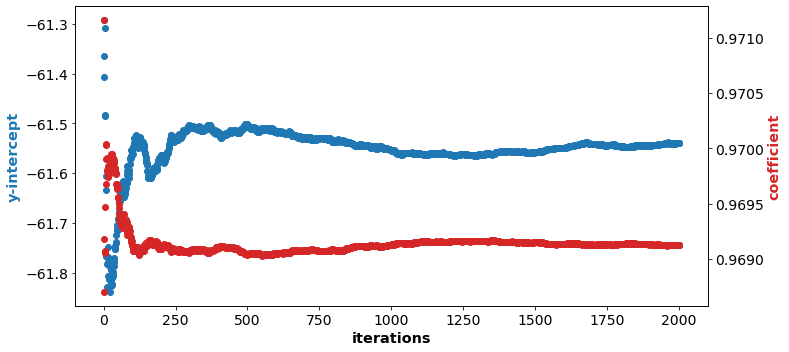

In [85]:
fig = plt.figure(figsize = (20,5))

color = 'tab:blue'
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(results['iteration'],results['theta0_mean'])
#ax1.tick_params(labelcolor=color)
plt.xlabel('iterations', fontweight = 'bold', fontsize = 'x-large')
plt.ylabel('y-intercept', fontweight = 'bold', fontsize = 'x-large', color =color)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax2 = ax1.twinx()
color = 'tab:red'
# ax2 = fig.add_subplot(1,2,2)
ax2.scatter(results['iteration'],results['theta1_mean'], color = color)
#lt.xlabel('iterations', fontweight = 'bold', fontsize = 'x-large')
#ax2.tick_params(labelcolor=color)
plt.ylabel('coefficient', fontweight = 'bold', fontsize = 'x-large', color = color)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.title('EPA[mi] vs. NEDC[mi]', loc='center', fontsize = 20)

plt.tight_layout()